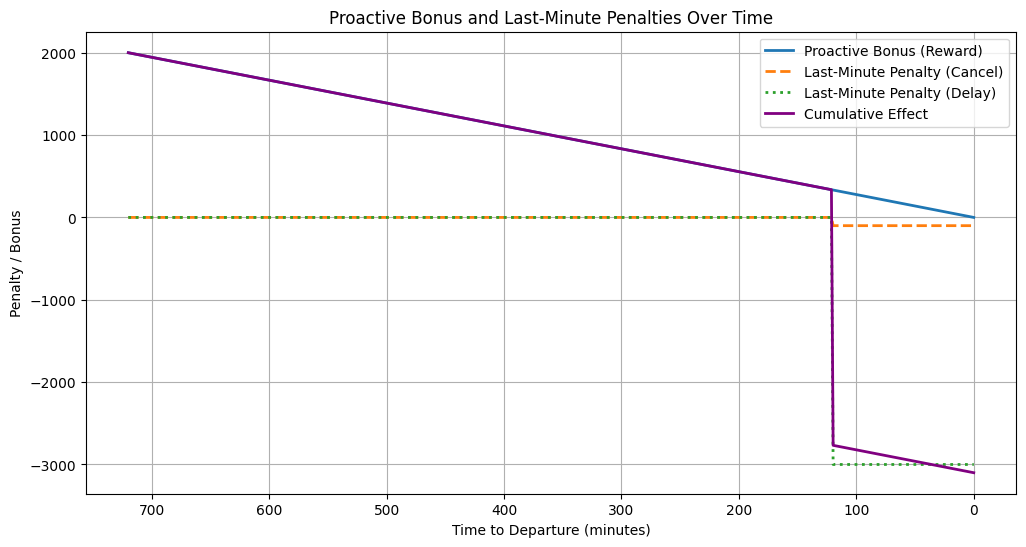

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from src.config import LAST_MINUTE_THRESHOLD, RESOLVED_CONFLICT_REWARD, LAST_MINUTE_FLIGHT_PENALTY

# Simulation parameters
total_recovery_window = 720  # 12 hours in minutes
time_to_departure = np.linspace(0, total_recovery_window, 500)  # Time to departure in minutes

# Proactive bonus calculation
normalized_lead_time = np.minimum(time_to_departure / total_recovery_window, 1.0)
proactive_bonus = RESOLVED_CONFLICT_REWARD * normalized_lead_time

# Last-minute penalty calculation
last_minute_penalty_cancel = np.where(
    time_to_departure < LAST_MINUTE_THRESHOLD,
    -LAST_MINUTE_FLIGHT_PENALTY,
    0
)
delay_minutes_example = 30 
last_minute_penalty_delay = np.where(
    time_to_departure < LAST_MINUTE_THRESHOLD,
    -LAST_MINUTE_FLIGHT_PENALTY * delay_minutes_example,
    0
)

# Cumulative effect (bonus + penalties)
cumulative_effect = proactive_bonus + last_minute_penalty_cancel + last_minute_penalty_delay

# Reverse the x-axis (time to departure)
time_to_departure_flipped = total_recovery_window - time_to_departure

# Adjust values to match the flipped x-axis (reverse time)
proactive_bonus_flipped = proactive_bonus[::-1]
last_minute_penalty_cancel_flipped = last_minute_penalty_cancel[::-1]
last_minute_penalty_delay_flipped = last_minute_penalty_delay[::-1]
cumulative_effect_flipped = cumulative_effect[::-1]

# Adjust LAST_MINUTE_THRESHOLD for flipped axis
last_minute_threshold_flipped = total_recovery_window - LAST_MINUTE_THRESHOLD

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(time_to_departure_flipped, proactive_bonus_flipped, label="Proactive Bonus (Reward)", linewidth=2)
plt.plot(time_to_departure_flipped, last_minute_penalty_cancel_flipped, label="Last-Minute Penalty (Cancel)", linestyle="--", linewidth=2)
plt.plot(time_to_departure_flipped, last_minute_penalty_delay_flipped, label="Last-Minute Penalty (Delay)", linestyle=":", linewidth=2)
plt.plot(time_to_departure_flipped, cumulative_effect_flipped, label="Cumulative Effect", color="purple", linewidth=2)

# Correct threshold for flipped axis
# plt.axvline(last_minute_threshold_flipped, color='red', linestyle='-.', label="Last-Minute Threshold")

plt.title("Proactive Bonus and Last-Minute Penalties Over Time")
plt.xlabel("Time to Departure (minutes)")
plt.ylabel("Penalty / Bonus")
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()  # Correctly flip x-axis
plt.show()
